## Goal: Prediction of Book-Rating(0~10)
### Dataset Info
- ID : 샘플 고유 ID
- User-ID : 유저 고유 ID
- Book-ID : 도서 고유 ID
- 유저 정보
  - Age : 나이
  - Location : 지역
- 도서 정보
  - Book-Title : 도서 명
  - Book-Author : 도서 저자
- Year-Of-Publication : 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)
- Publisher : 출판사
- Book-Rating : 유저가 도서에 부여한 평점 (0점 ~ 10점)
  - 단, 0점인 경우에는 유저가 해당 도서에 관심이 없고 관련이 없는 경우

In [ ]:
from google.colab import drive

drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
!unzip drive/MyDrive/recommend.zip -d data/

Archive:  drive/MyDrive/recommend.zip
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Load Data

In [ ]:
train_pd = pd.read_csv('data/train.csv')
test_pd = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
def get_splited_data(x):
  return x.replace(' ','').strip().split(',')

In [ ]:
#split Location column
train_pd['city'] = train_pd.Location.apply(get_splited_data).str[0]
train_pd['state'] = train_pd.Location.apply(get_splited_data).str[1]
train_pd['country'] = train_pd.Location.apply(get_splited_data).str[2]

In [ ]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
 10  city                 871393 non-null  object 
 11  state                871393 non-null  object 
 12  country              871393 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 86.4+ MB


In [ ]:
#check Year-Of-Publication's data
train_pd.loc[train_pd['Year-Of-Publication']==-1].groupby(['Book-ID']).count().sort_values('ID',ascending=False)

,ID,User-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,city,state,country
Book-ID,,,,,,,,,,,,
BOOK_102531,180,180,180,180,180,180,180,180,180,180,180,180
BOOK_045458,90,90,90,90,90,90,90,90,90,90,90,90
BOOK_082346,87,87,87,87,87,87,87,87,87,87,87,87
BOOK_178258,71,71,71,71,71,71,71,71,71,71,71,71
BOOK_175634,63,63,63,63,63,63,63,63,63,63,63,63
...,...,...,...,...,...,...,...,...,...,...,...,...
BOOK_141751,1,1,1,1,1,1,1,1,1,1,1,1
BOOK_041502,1,1,1,1,1,1,1,1,1,1,1,1
BOOK_041452,1,1,1,1,1,1,1,1,1,1,1,1


## EDA

### Distribution of Book-Rating

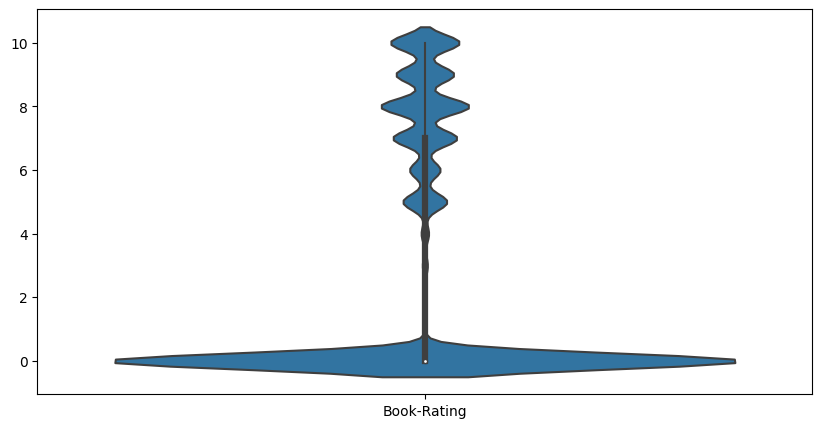

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(train_pd[['Book-Rating']])
plt.show()

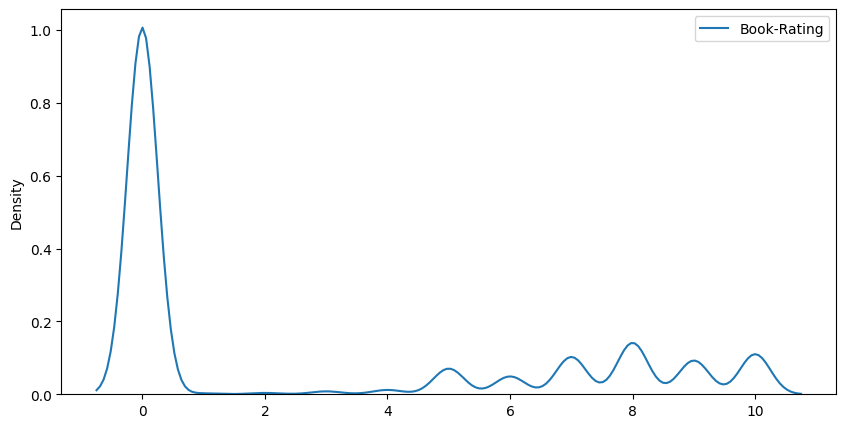

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(train_pd[['Book-Rating']])
plt.show()

In [ ]:
train_pd[['Book-Rating']].describe()

,Book-Rating
count,871393.000000
mean,2.820579
std,3.846906
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,10.000000


------
there are very few intermidiate ratings(3~6)

#### Book-Rating > 6

<Axes: xlabel='Book-Rating'>

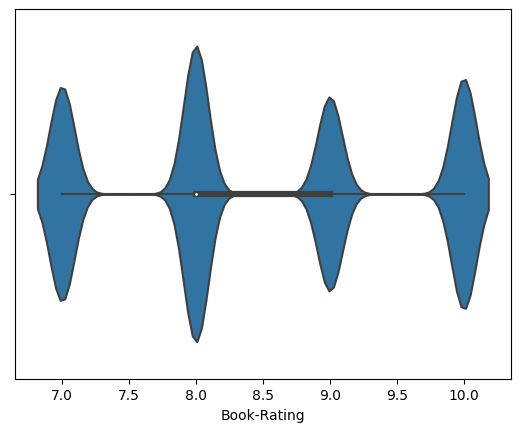

In [ ]:
sns.violinplot(x='Book-Rating', data=train_pd.loc[(train_pd['Book-Rating'] > 6)])

In [ ]:
train_pd.loc[(train_pd['Book-Rating'] > 6)].describe()

,Book-Rating,Age,Year-Of-Publication
count,243341.000000,243341.000000,243341.000000
mean,8.471314,36.353640,1966.508373
std,1.096156,11.683417,239.817604
min,7.000000,0.000000,-1.000000
25%,8.000000,30.000000,1992.000000
50%,8.000000,35.000000,1998.000000
75%,9.000000,41.000000,2001.000000
max,10.000000,244.000000,2021.000000


#### 3<=Book-Rating<=6

<Axes: xlabel='Book-Rating'>

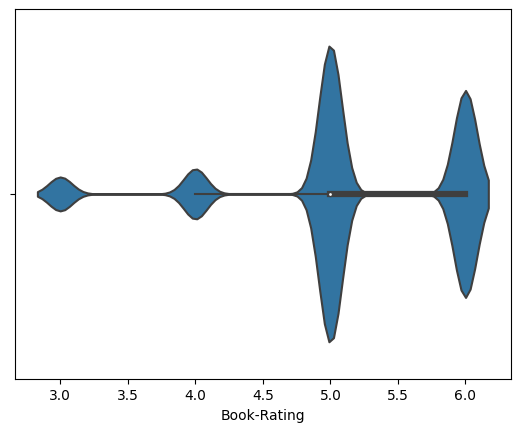

In [ ]:
sns.violinplot(x='Book-Rating', data=train_pd.loc[(train_pd['Book-Rating'] <=6) & (train_pd['Book-Rating'] >=3 )])

In [ ]:
train_pd.loc[(train_pd['Book-Rating'] <=6) & (train_pd['Book-Rating'] >=3 )].describe()

,Book-Rating,Age,Year-Of-Publication
count,75922.000000,75922.000000,75922.000000
mean,5.150944,35.925463,1966.052396
std,0.802538,11.069924,240.921078
min,3.000000,0.000000,-1.000000
25%,5.000000,31.000000,1992.000000
50%,5.000000,35.000000,1997.000000
75%,6.000000,37.000000,2001.000000
max,6.000000,244.000000,2021.000000


#### Book-Rating>=3

<Axes: xlabel='Book-Rating'>

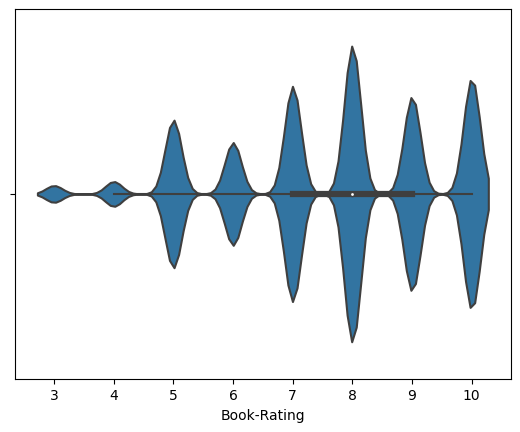

In [ ]:
sns.violinplot(x='Book-Rating', data=train_pd.loc[train_pd['Book-Rating'] >=3])

In [ ]:
train_pd.loc[train_pd['Book-Rating'] >=3].describe()

,Book-Rating,Age,Year-Of-Publication
count,319263.000000,319263.000000,319263.000000
mean,7.681717,36.251817,1966.399940
std,1.751365,11.541904,240.080175
min,3.000000,0.000000,-1.000000
25%,7.000000,31.000000,1992.000000
50%,8.000000,35.000000,1997.000000
75%,9.000000,40.000000,2001.000000
max,10.000000,244.000000,2021.000000


#### Book-Rating<3

<Axes: xlabel='Book-Rating'>

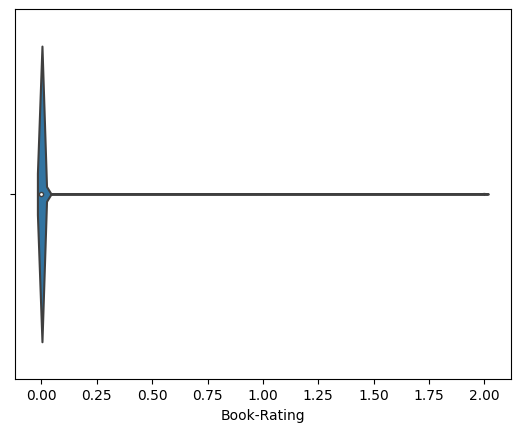

In [ ]:
sns.violinplot(x='Book-Rating', data=train_pd.loc[train_pd['Book-Rating'] <3])

In [ ]:
train_pd.loc[train_pd['Book-Rating'] <3].describe()

,Book-Rating,Age,Year-Of-Publication
count,552130.000000,552130.000000,552130.000000
mean,0.009681,37.116761,1970.350901
std,0.130002,12.347074,220.827307
min,0.000000,0.000000,-1.000000
25%,0.000000,31.000000,1991.000000
50%,0.000000,35.000000,1997.000000
75%,0.000000,42.000000,2000.000000
max,2.000000,244.000000,2021.000000


### Distribution of Book-Rating per Age

#### Age Distribution

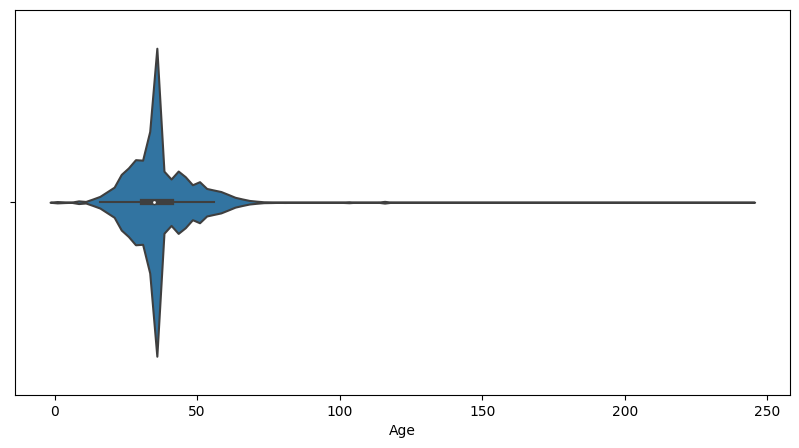

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Age', data=train_pd)
plt.show()

##### Categorization
- it looks like it needs to be categorized
  - 0: 0~9
  - 1: 10~19
  - 2: 20~29
  - ...
  - 8: 80 ~

In [ ]:
def get_age_category(age):
  if age >= 80:
    return 8
  else:
    return int(age*0.1)


Age_category = train_pd.Age.apply(get_age_category)

In [ ]:
train_pd['Age_category'] = Age_category

### Book-Rating per Age category

In [ ]:
train_pd.describe()

,Book-Rating,Age,Year-Of-Publication,Age_category
count,871393.000000,871393.000000,871393.000000,871393.000000
mean,2.820579,36.799861,1968.903339,3.196291
std,3.846906,12.065509,228.077752,1.108253
min,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,31.000000,1991.000000,3.000000
50%,0.000000,35.000000,1997.000000,3.000000
75%,7.000000,41.000000,2001.000000,4.000000
max,10.000000,244.000000,2021.000000,8.000000


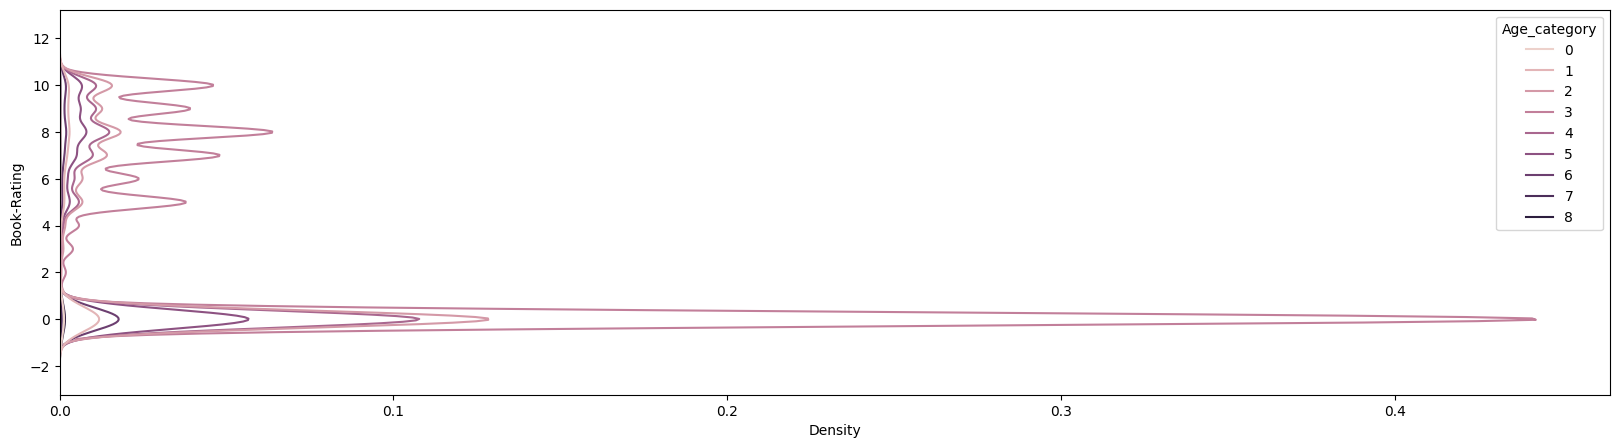

In [ ]:
plt.figure(figsize=(20,5))
sns.kdeplot(y='Book-Rating', data=train_pd, hue='Age_category')
plt.show()

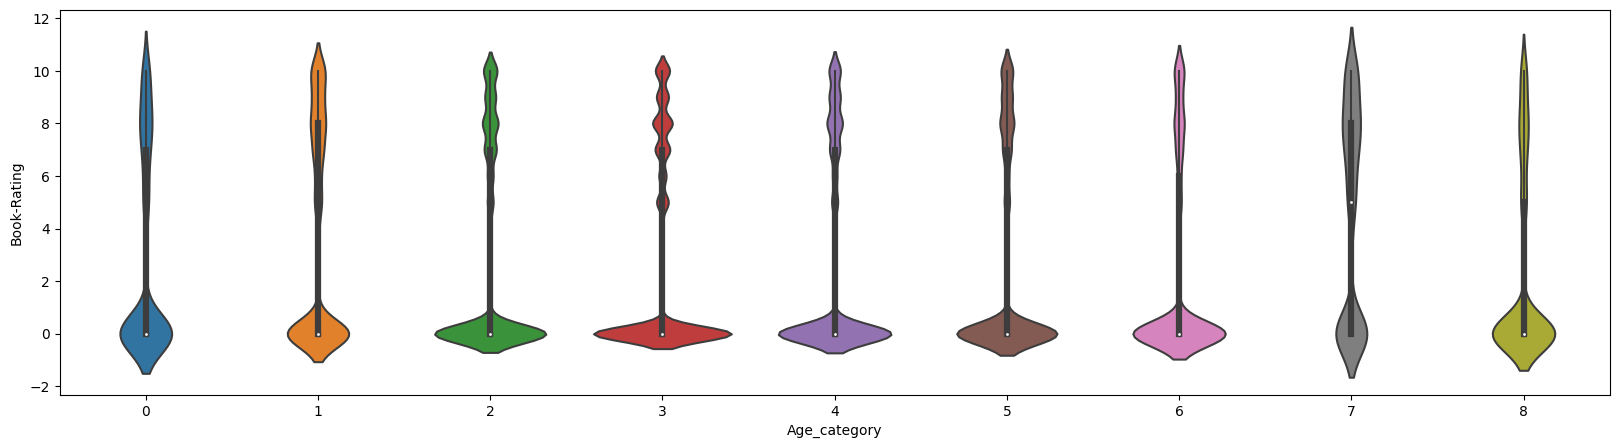

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(y='Book-Rating', x= 'Age_category', data=train_pd)
plt.show()

In [ ]:
train_pd[['Age_category','Book-Rating']].groupby('Age_category').describe()

Book-Rating                                              
                   count      mean       std  min  25%  50%  75%   max
Age_category                                                          
0                 3488.0  2.872993  3.846075  0.0  0.0  0.0  7.0  10.0
1                26385.0  3.692894  4.071668  0.0  0.0  0.0  8.0  10.0
2               158672.0  2.861217  3.894446  0.0  0.0  0.0  7.0  10.0
3               442096.0  2.836074  3.809332  0.0  0.0  0.0  7.0  10.0
4               130747.0  2.682631  3.837965  0.0  0.0  0.0  7.0  10.0
5                77540.0  2.732370  3.889162  0.0  0.0  0.0  7.0  10.0
6                26248.0  2.275792  3.690252  0.0  0.0  0.0  6.0  10.0
7                 2703.0  4.541990  4.017310  0.0  0.0  5.0  8.0  10.0
8                 3514.0  2.258680  3.559260  0.0  0.0  0.0  5.0  10.0

In [ ]:
train_pd[['Age_category','Book-Rating']].loc[train_pd['Book-Rating']>0].groupby('Age_category').describe()

Book-Rating                                              
                   count      mean       std  min  25%  50%  75%   max
Age_category                                                          
0                 1326.0  7.557315  1.871160  1.0  6.0  8.0  9.0  10.0
1                12648.0  7.703748  1.919568  1.0  7.0  8.0  9.0  10.0
2                58742.0  7.728627  1.830090  1.0  7.0  8.0  9.0  10.0
3               167583.0  7.481767  1.876973  1.0  6.0  8.0  9.0  10.0
4                45113.0  7.774832  1.760490  1.0  7.0  8.0  9.0  10.0
5                26887.0  7.879942  1.748704  1.0  7.0  8.0  9.0  10.0
6                 7606.0  7.853668  1.785180  1.0  7.0  8.0  9.0  10.0
7                 1600.0  7.673125  1.797442  1.0  7.0  8.0  9.0  10.0
8                 1084.0  7.321956  1.996451  1.0  6.0  8.0  9.0  10.0

#### check
- it is concentrated in zero ratings regardless of age
- except for the zero rating, there doesn't seem to be any commonality of Age

# Feature Engineering

## Segmentation of Zero Book-Rating 
- hypothesis: A zero Rating would have three meanings
  1. pessimist's rating
    - it might not be a terrible book
  2. optimist or normal person's rating
    - it means that 'this book is terrible'
  3. None
    - forgot to rate it or maybe it was a mistake..?


### zero rating ratio of each reader

In [ ]:
train_pd['is_zero'] = (train_pd['Book-Rating'] == 0).astype(int)

In [ ]:
seg_pd = train_pd[['is_zero','User-ID']].groupby('User-ID').agg(is_zero_count = ('is_zero','count'),
 is_zero_sum = ('is_zero','sum'))

In [ ]:
seg_pd['zero_ratio'] = seg_pd['is_zero_sum']/seg_pd['is_zero_count']

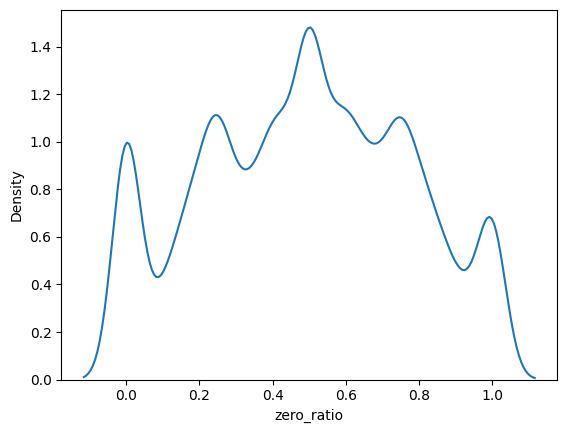

In [ ]:
sns.kdeplot(x='zero_ratio', data=seg_pd.loc[seg_pd['is_zero_count']>3])
plt.show()

In [ ]:
seg_pd.loc[seg_pd['is_zero_count']>3].describe()

,is_zero_count,is_zero_sum,zero_ratio
count,21441.000000,21441.000000,21441.000000
mean,36.780094,24.050324,0.488115
std,161.325635,123.465689,0.284063
min,4.000000,0.000000,0.000000
25%,5.000000,2.000000,0.250000
50%,9.000000,4.000000,0.500000
75%,22.000000,11.000000,0.714286
max,11143.000000,6439.000000,1.000000


In [ ]:
seg_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83256 entries, USER_00000 to USER_92100
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_zero_count  83256 non-null  int64  
 1   is_zero_sum    83256 non-null  int64  
 2   zero_ratio     83256 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 4.6+ MB


### who is pessimist?
  - who gave zero ratings to almost every read book they read (maybe over 80% of books they read)
    

In [ ]:
seg_pd['is_pessimist'] = ((seg_pd['is_zero_count'] >3) & (seg_pd['zero_ratio']>=0.8)).astype(int)

In [ ]:
seg_pd.loc[seg_pd.is_pessimist == 1]

,is_zero_count,is_zero_sum,zero_ratio,is_pessimist
User-ID,,,,
USER_00050,13,11,0.846154,1
USER_00059,21,17,0.809524,1
USER_00093,5,4,0.800000,1
USER_00102,11,10,0.909091,1
USER_00111,5,5,1.000000,1
...,...,...,...,...
USER_91925,6,5,0.833333,1
USER_91945,28,28,1.000000,1
USER_92025,11,9,0.818182,1


In [ ]:
merge_pd = pd.merge(seg_pd.reset_index(),train_pd,how='right',on='User-ID').fillna(0)

In [ ]:
merge_pd

,User-ID,is_zero_count,is_zero_sum,zero_ratio,is_pessimist,ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,city,state,country,Age_category,is_zero
0,USER_00000,8,3,0.375,0,TRAIN_000000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,sackville,newbrunswick,canada,2,0
1,USER_00000,8,3,0.375,0,TRAIN_000001,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,sackville,newbrunswick,canada,2,0
2,USER_00000,8,3,0.375,0,TRAIN_000002,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,sackville,newbrunswick,canada,2,1
3,USER_00000,8,3,0.375,0,TRAIN_000003,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,sackville,newbrunswick,canada,2,1
4,USER_00000,8,3,0.375,0,TRAIN_000004,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,sackville,newbrunswick,canada,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,USER_92096,1,1,1.000,0,TRAIN_871388,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,minneapolis,minnesota,usa,3,1
871389,USER_92097,1,1,1.000,0,TRAIN_871389,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,temple,texas,usa,3,1
871390,USER_92098,1,1,1.000,0,TRAIN_871390,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,ottawa,ontario,canada,4,1
871391,USER_92099,1,0,0.000,0,TRAIN_871391,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,maplegrove,minnesota,usa,4,0


## User info Aggregation

In [ ]:
user_info = merge_pd.groupby('User-ID').agg(user_count=('ID','count'),
                                            user_median = ('Book-Rating','median'),
                                            user_mad = ('Book-Rating', 'mad'),
                                            )

In [ ]:
user_info

,user_count,user_median,user_mad
User-ID,,,
USER_00000,8,6.5,3.562500
USER_00001,3,5.0,2.666667
USER_00002,1,0.0,0.000000
USER_00003,22,7.5,3.247934
USER_00004,8,7.5,2.000000
...,...,...,...
USER_92096,1,0.0,0.000000
USER_92097,1,0.0,0.000000
USER_92098,1,0.0,0.000000


In [ ]:
user_info.reset_index(inplace=True)
user_info

,User-ID,user_count,user_median,user_mad
0,USER_00000,8,6.5,3.562500
1,USER_00001,3,5.0,2.666667
2,USER_00002,1,0.0,0.000000
3,USER_00003,22,7.5,3.247934
4,USER_00004,8,7.5,2.000000
...,...,...,...,...
83251,USER_92096,1,0.0,0.000000
83252,USER_92097,1,0.0,0.000000
83253,USER_92098,1,0.0,0.000000
83254,USER_92099,1,8.0,0.000000


## Book info Aggregation

In [ ]:
book_info = merge_pd.groupby('Book-ID').agg(book_count=('ID','count'),
                                            book_median = ('Book-Rating','median'),
                                            book_mad = ('Book-Rating', 'mad'),
                                            )

In [ ]:
book_info.reset_index(inplace=True)
book_info

,Book-ID,book_count,book_median,book_mad
0,BOOK_000001,1,0.0,0.000000
1,BOOK_000002,1,0.0,0.000000
2,BOOK_000003,1,0.0,0.000000
3,BOOK_000004,30,0.0,2.111111
4,BOOK_000005,3,0.0,0.000000
...,...,...,...,...
243436,BOOK_270051,1,0.0,0.000000
243437,BOOK_270052,15,6.0,4.106667
243438,BOOK_270053,3,6.0,1.111111
243439,BOOK_270054,1,0.0,0.000000


In [ ]:
merge_pd2 = pd.merge(pd.merge(merge_pd, user_info, how='left', on='User-ID'), book_info, how='left', on='Book-ID')

In [ ]:
merge_pd2

,User-ID,is_zero_count,is_zero_sum,zero_ratio,is_pessimist,ID,Book-ID,Book-Rating,Age,Location,...,state,country,Age_category,is_zero,user_count,user_median,user_mad,book_count,book_median,book_mad
0,USER_00000,8,3,0.375,0,TRAIN_000000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",...,newbrunswick,canada,2,0,8,6.5,3.5625,14,0.0,3.183673
1,USER_00000,8,3,0.375,0,TRAIN_000001,BOOK_081205,8,23.0,"sackville, new brunswick, canada",...,newbrunswick,canada,2,0,8,6.5,3.5625,6,3.5,4.000000
2,USER_00000,8,3,0.375,0,TRAIN_000002,BOOK_086781,0,23.0,"sackville, new brunswick, canada",...,newbrunswick,canada,2,1,8,6.5,3.5625,2,0.0,0.000000
3,USER_00000,8,3,0.375,0,TRAIN_000003,BOOK_098622,0,23.0,"sackville, new brunswick, canada",...,newbrunswick,canada,2,1,8,6.5,3.5625,23,0.0,3.489603
4,USER_00000,8,3,0.375,0,TRAIN_000004,BOOK_180810,8,23.0,"sackville, new brunswick, canada",...,newbrunswick,canada,2,0,8,6.5,3.5625,53,0.0,2.627269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,USER_92096,1,1,1.000,0,TRAIN_871388,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",...,minnesota,usa,3,1,1,0.0,0.0000,2,0.0,0.000000
871389,USER_92097,1,1,1.000,0,TRAIN_871389,BOOK_258124,0,35.0,"temple, texas, usa",...,texas,usa,3,1,1,0.0,0.0000,21,0.0,4.081633
871390,USER_92098,1,1,1.000,0,TRAIN_871390,BOOK_071848,0,45.0,"ottawa, ontario, canada",...,ontario,canada,4,1,1,0.0,0.0000,5,6.0,3.680000
871391,USER_92099,1,0,0.000,0,TRAIN_871391,BOOK_252599,8,43.0,"maple grove, minnesota, usa",...,minnesota,usa,4,0,1,8.0,0.0000,2,4.0,4.000000


# Modeling

In [ ]:
merge_pd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871393 entries, 0 to 871392
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              871393 non-null  object 
 1   is_zero_count        871393 non-null  int64  
 2   is_zero_sum          871393 non-null  int64  
 3   zero_ratio           871393 non-null  float64
 4   is_pessimist         871393 non-null  int64  
 5   ID                   871393 non-null  object 
 6   Book-ID              871393 non-null  object 
 7   Book-Rating          871393 non-null  int64  
 8   Age                  871393 non-null  float64
 9   Location             871393 non-null  object 
 10  Book-Title           871393 non-null  object 
 11  Book-Author          871393 non-null  object 
 12  Year-Of-Publication  871393 non-null  float64
 13  Publisher            871393 non-null  object 
 14  city                 871393 non-null  object 
 15  state            

### check consistency

In [ ]:
merge_pd2.loc[merge_pd2.is_zero_count != merge_pd2.user_count]

,User-ID,is_zero_count,is_zero_sum,zero_ratio,is_pessimist,ID,Book-ID,Book-Rating,Age,Location,...,state,country,Age_category,is_zero,user_count,user_median,user_mad,book_count,book_median,book_mad


### check duplications

In [ ]:
merge_pd2.groupby('ID').agg(count=('ID', 'count')).sort_values('count', ascending=False)

,count
ID,
TRAIN_000000,1
TRAIN_580920,1
TRAIN_580922,1
TRAIN_580923,1
TRAIN_580924,1
...,...
TRAIN_290468,1
TRAIN_290469,1
TRAIN_290470,1


### split data set

In [ ]:
feature_cols = ['is_zero_sum','is_pessimist', 'Age', 'Age_category', 'user_count','user_median','user_mad', 'book_count','book_median','book_mad' ]
target_pd = merge_pd2[['ID']+feature_cols+['Book-Rating']]

In [ ]:
target_pd

,ID,is_zero_sum,is_pessimist,Age,Age_category,user_count,user_median,user_mad,book_count,book_median,book_mad,Book-Rating
0,TRAIN_000000,3,0,23.0,2,8,6.5,3.5625,14,0.0,3.183673,8
1,TRAIN_000001,3,0,23.0,2,8,6.5,3.5625,6,3.5,4.000000,8
2,TRAIN_000002,3,0,23.0,2,8,6.5,3.5625,2,0.0,0.000000,0
3,TRAIN_000003,3,0,23.0,2,8,6.5,3.5625,23,0.0,3.489603,0
4,TRAIN_000004,3,0,23.0,2,8,6.5,3.5625,53,0.0,2.627269,8
...,...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,1,0,34.0,3,1,0.0,0.0000,2,0.0,0.000000,0
871389,TRAIN_871389,1,0,35.0,3,1,0.0,0.0000,21,0.0,4.081633,0
871390,TRAIN_871390,1,0,45.0,4,1,0.0,0.0000,5,6.0,3.680000,0
871391,TRAIN_871391,0,0,43.0,4,1,8.0,0.0000,2,4.0,4.000000,8


In [ ]:
X = target_pd[feature_cols]
y= target_pd['Book-Rating']

In [ ]:
N = 710

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= N)
for train_index, test_index in split.split(X,y):
    train_set = target_pd.loc[train_index]
    valid_set = target_pd.loc[test_index]

#### check the distribution of train and valid set

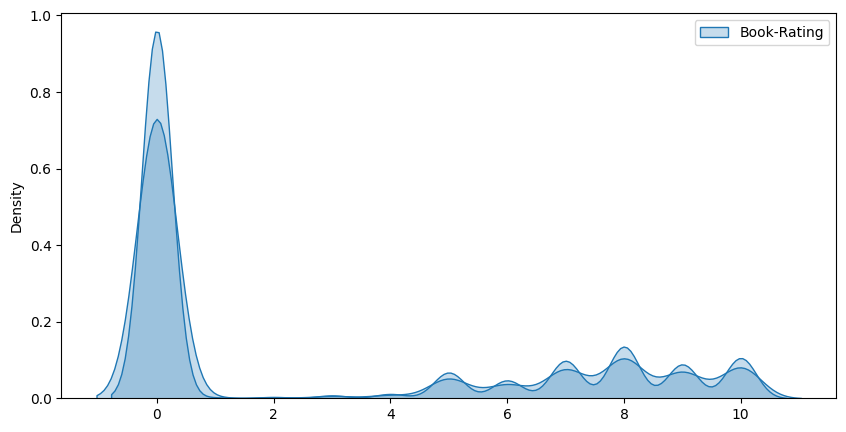

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(valid_set[['Book-Rating']],  shade=True)
sns.kdeplot(train_set[['Book-Rating']],  shade=True)
plt.show()

### Train

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from xgboost import plot_importance 
# # XGBoost 모델을 생성합니다.
model = xgb.XGBRegressor(n_estimators=100, 
                         learning_rate=0.01,
                         subsample=0.8,
                        colsample_bytree=1,
                          max_depth=7)

In [ ]:
model.fit(train_set[feature_cols], train_set['Book-Rating'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

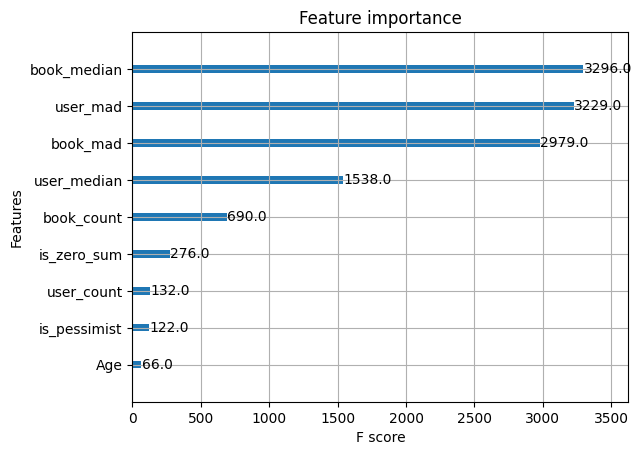

In [ ]:
plot_importance(model)

#### Valid

In [ ]:
valid_pred = model.predict(valid_set[feature_cols]).astype(int)

In [ ]:
def rmse(real: list, predict: list) -> float:
    pred = np.array(predict)
    return np.sqrt(np.mean((real-pred) ** 2))
  
rmse(valid_set['Book-Rating'].to_numpy(), valid_pred)

3.131872116665467

## Test
- train의 데이터의 user_info, book_info 갖다 쓰기

In [ ]:
merge_test = pd.merge(pd.merge(test_pd, user_info, how='left', on='User-ID'), book_info, how='left', on='Book-ID')

In [ ]:
merge_test = pd.merge(merge_test, seg_pd.reset_index(), how='left', on='User-ID')

In [ ]:
merge_test['Age_category'] = merge_test.Age.apply(get_age_category)

In [ ]:
test_pred = model.predict(merge_test[feature_cols])

In [ ]:
merge_test['Book-Rating'] = test_pred.astype(int)

In [ ]:
submission_pd = merge_test[['ID','Book-Rating']]

In [ ]:
submission_pd

,ID,Book-Rating
0,TEST_000000,4
1,TEST_000001,4
2,TEST_000002,1
3,TEST_000003,4
4,TEST_000004,3
...,...,...
159616,TEST_159616,3
159617,TEST_159617,1
159618,TEST_159618,0
159619,TEST_159619,1


In [ ]:
submission = submission_pd
submission

,ID,Book-Rating
0,TEST_000000,4
1,TEST_000001,4
2,TEST_000002,1
3,TEST_000003,4
4,TEST_000004,3
...,...,...
159616,TEST_159616,3
159617,TEST_159617,1
159618,TEST_159618,0
159619,TEST_159619,1


In [ ]:
submission.to_csv(f'./submission.csv', index=False)

In [ ]:
pd.read_csv('./submission.csv')

,ID,Book-Rating
0,TEST_000000,4
1,TEST_000001,4
2,TEST_000002,1
3,TEST_000003,4
4,TEST_000004,3
...,...,...
159616,TEST_159616,3
159617,TEST_159617,1
159618,TEST_159618,0
159619,TEST_159619,1


# Ideas(조금씩 꺼내서 확인해보자)
- 유저 관점
  - 후한 유저냐 박한 유저냐
    - train 데이터에 Book-Rating 요약한다음에 test에 갖다 쓰기
  - 책을 얼마나 읽은 유저냐 
    - 많이 읽었을수록 본인한테 맞는 책을 고르는 감각이 뛰어나서 평점이 점점 높아지지않을까
  - 알바
    - negative: 라이벌(?) 작품에 평점 테러
    - positive: 관련 작품에 후후후한 평점만 
  - 사는 나라, 지역
     - 본인이 살아온 환경, 정서랑 너무 안맞으면 그게 호기심, 흥미를 유발할 수 있지만 이질감때문에 역효과가 날 수도 있음

- 책 관점
  - 대중적인 책인가
    - 하위 평점(0~3)이 거의 없음
  - 호불호가 갈리는 책인가
    - 두개의 분포가 존재

  
- 저자 관점
  - 성공작이 많은가
    - 저자가 쓴 각각의 책 요약값(평점 중앙값 등등)이 높은게 많은지

- 출판사 관점
  - 매번 망작만 출판하는 회사
  - 히트칠 대작만 출판하는 노하우 있는 회사